In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


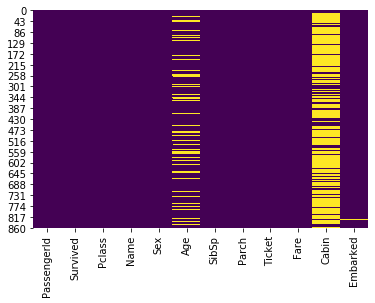

In [6]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [7]:
data.drop('Cabin',axis=1,inplace=True)

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


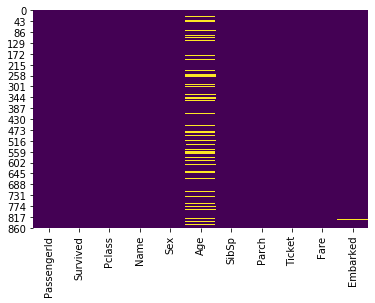

In [9]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

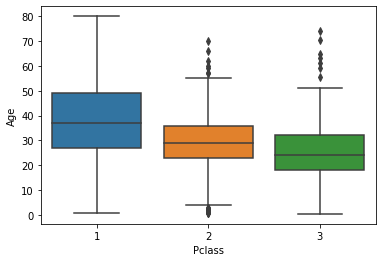

In [10]:
sns.boxplot(x='Pclass',y='Age',data=data)

In [12]:
def fillmiss(df):
    age=df[0]
    pcl=df[1]
    if pd.isnull(age) :
        if pcl==1:
            return 37
        if pcl==2:
            return 30
        if pcl==3:
            return 24
    else:
        return age

In [13]:
data['Age']=data[['Age','Pclass']].apply(fillmiss,axis=1)

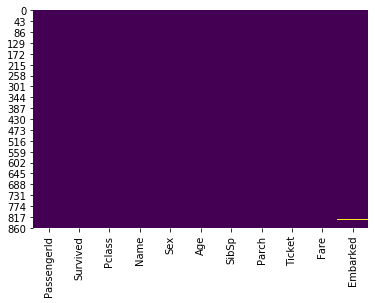

In [14]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [15]:
data.dropna(inplace=True)

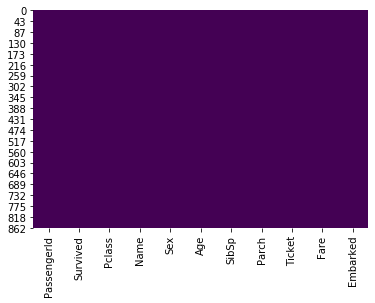

In [16]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [17]:
male=pd.get_dummies(data['Sex'],drop_first=True)
data=pd.concat([data,male],axis=1)
data.drop('Sex',axis=1,inplace=True)

In [18]:
embark=pd.get_dummies(data['Embarked'],drop_first=True)
data=pd.concat([data,embark],axis=1)
data.drop('Embarked',axis=1,inplace=True)

In [19]:
data.drop(['Name','Ticket'],axis=1,inplace=True)

In [20]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
x_train=data.drop('Survived',axis=1)

In [23]:
y_train=data['Survived']

In [24]:
lr=LogisticRegression()

In [25]:
lr.fit(x_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
x_test=pd.read_csv('test.csv')

In [27]:
x_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


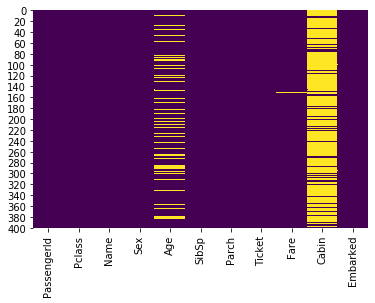

In [28]:
sns.heatmap(x_test.isnull(),cbar=False,cmap='viridis')

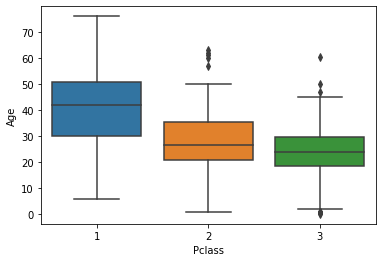

In [29]:
sns.boxplot(x='Pclass',y='Age',data=x_test)

In [30]:
def fillmiss2(df):
    age=df[0]
    pcl=df[1]
    if pd.isnull(age) :
        if pcl==1:
            return 37
        if pcl==2:
            return 30
        if pcl==3:
            return 24
    else:
        return age

In [31]:
x_test['Age']=x_test[['Age','Pclass']].apply(fillmiss2,axis=1)

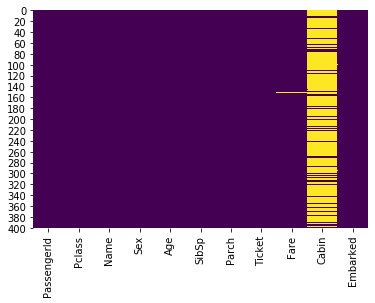

In [32]:
sns.heatmap(x_test.isnull(),cbar=False,cmap='viridis')

In [33]:
x_test.drop('Cabin',axis=1,inplace=True)

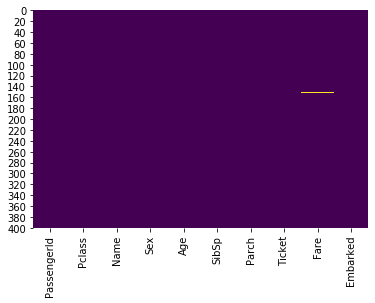

In [34]:
sns.heatmap(x_test.isnull(),cbar=False,cmap='viridis')

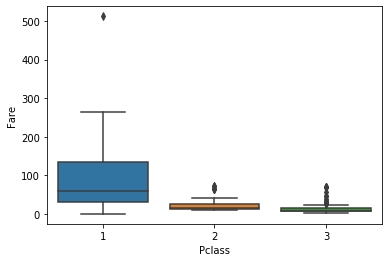

In [35]:
sns.boxplot(x='Pclass',y='Fare',data=x_test)

In [38]:
dg=x_test.groupby('Pclass')

In [39]:
dg['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [36]:
def fillmiss3(df):
    fare=df[0]
    pcl=df[1]
    if pd.isnull(fare) :
        if pcl==1:
            return 94
        if pcl==2:
            return 22
        if pcl==3:
            return 12
    else:
        return fare

In [40]:
x_test['Fare']=x_test[['Fare','Pclass']].apply(fillmiss3,axis=1)

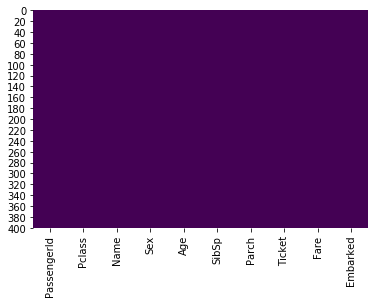

In [41]:
sns.heatmap(x_test.isnull(),cbar=False,cmap='viridis')

In [42]:
male=pd.get_dummies(x_test['Sex'],drop_first=True)
x_test=pd.concat([x_test,male],axis=1)
x_test.drop('Sex',axis=1,inplace=True)

In [43]:
embark=pd.get_dummies(x_test['Embarked'],drop_first=True)
x_test=pd.concat([x_test,embark],axis=1)
x_test.drop('Embarked',axis=1,inplace=True)

In [44]:
x_test.drop(['Name','Ticket'],axis=1,inplace=True)

In [45]:
x_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [46]:
predictions=lr.predict(x_test)

In [47]:
res=pd.DataFrame(predictions,columns=['Survived'],index=x_test['PassengerId'])
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 1 columns):
Survived    418 non-null int64
dtypes: int64(1)
memory usage: 6.5 KB


In [48]:
res

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [49]:
df=res.reset_index()

In [50]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [51]:
df.to_csv('my_output.csv',index=False)